In [1]:
A=np.loadtxt("./cases_100locations_first77days.txt")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

In [3]:
P=pd.DataFrame(A,columns=['loc', 'day', 'S',"I","R"])
P

,loc,day,S,I,R
0,1.0,0.0,0.989,0.011,0.000
1,1.0,1.0,0.988,0.012,0.000
2,1.0,2.0,0.986,0.014,0.000
3,1.0,3.0,0.986,0.014,0.000
4,1.0,4.0,0.985,0.014,0.001
5,1.0,5.0,0.985,0.014,0.001
6,1.0,6.0,0.984,0.015,0.001
7,1.0,7.0,0.983,0.016,0.001
8,1.0,8.0,0.980,0.019,0.001
9,1.0,9.0,0.976,0.023,0.001


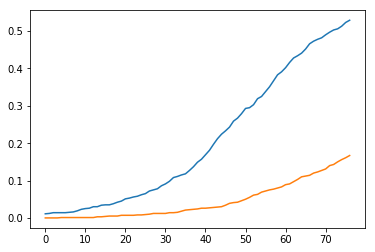

In [10]:
P1=P.loc[P["loc"]==1]
plt.plot(P1["day"],P1["I"],P1["R"])
M=np.transpose(np.array([P1["day"],P1["S"],P1["I"],P1["R"]]))

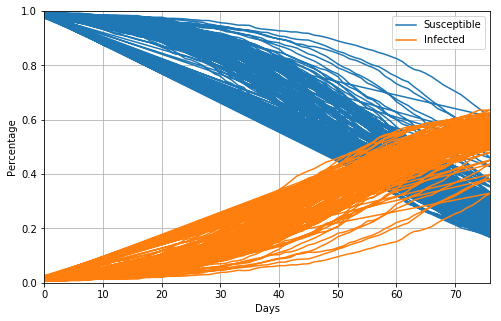

In [13]:
P.plot(x='day',y=['S','I'],figsize=(8,5), grid=True,ylim=(0,1))
plt.ylabel("Percentage")
plt.xlabel("Days")
plt.legend(['Susceptible','Infected'])
plt.savefig("./Images/Locations.png",dpi=100,bbox_inches='tight')
plt.show()

In [11]:
beta=0 
print(M[0,1])
integral=M[:,1].dot(M[:,2])
print(integral)
beta=-(M[76,1]-M[0,1])/integral
print(beta)
integral=np.sum(M[:,2])
gamma=(M[76,3]-M[0,3])/integral
print(gamma)
print()


0.989
8.955537
0.07648899222905339
0.010423818737906498



In [15]:
p_M=np.ones(3) #parameter_matrix(beta,gamma,R)

for i in range (1,101,1):
    #selection of location i
    P_i=P.loc[P["loc"]==i]
    M=np.transpose(np.array([P_i["day"],P_i["S"],P_i["I"],P_i["R"]]))
    
    #computation of beta and gamma
    p=np.array([])
    beta=-(M[76,1]-M[0,1])/(M[:,1].dot(M[:,2]))
    p=np.append(p,beta)
    gamma=(M[76,3]-M[0,3])/(np.sum(M[:,2]))
    p=np.append(p,gamma)
    R=beta/gamma
    p=np.append(p,R)
    p_M=np.vstack([p_M,p])

p_M=np.delete(p_M,0,axis=0)

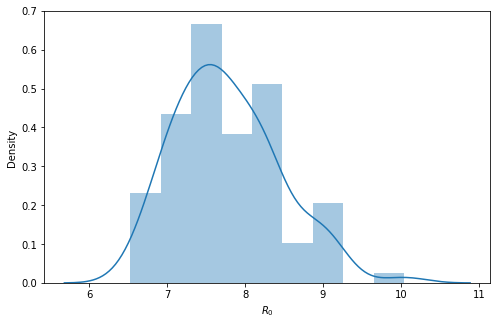

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(p_M[:,2])
plt.ylabel("Density")
plt.xlabel("$R_0$")
plt.savefig("./Images/R0.png",dpi=100,bbox_inches='tight')
plt.show()

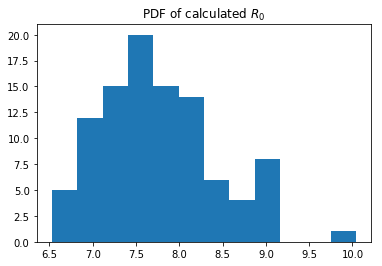

In [89]:
plt.hist(p_M[:,2],12)
plt.title("PDF of calculated $R_0$")
plt.savefig("R0_hist",dpi=800)

In [90]:
l=list(p_M[:,2]>9.5)
l.index(True)
print("La loc. con il maggioe R0 è:",l.index(True)+1,"con valore",p_M[l.index(True),2])

La loc. con il maggioe R0 è: 68 con valore 10.042267404173991


In [91]:
p_mean=np.mean(p_M,axis=0)
p_std=np.std(p_M,axis=0)
print("beta medio: ",p_mean[0],"+-",p_std[0])
print("gamma medio: ",p_mean[1],"+-",p_std[1])
print("R0 medio: ",p_mean[2],"+-",p_std[2])

beta medio:  0.07507346089734118 +- 0.0026040449870519656
gamma medio:  0.00971910766594186 +- 0.0007627979098948384
R0 medio:  7.77156412496837 +- 0.6655055218325028


In [92]:
np.std(p_M,axis=0)

array([0.00260404, 0.0007628 , 0.66550552])

In [101]:
p_m=np.array([])
for f in range(0,100,1):
    print(f,p_M[f,2]-7.77156412496837)
    if (np.abs(p_M[f,2]-p_mean[2])<3*0.6655055218325028):
        p_m=np.append(p_m,p_M[f,2])
print(np.mean(p_m),np.std(p_m))

0 -0.4336590680721759
1 0.6152308956764418
2 1.1265634884368563
3 0.4573690705029936
4 0.9719692790167453
5 0.41633743203470885
6 -0.1628776864211572
7 -0.07629062669034514
8 -0.9492361164616208
9 -0.14145010232237976
10 0.5226857729600525
11 0.48385638806883335
12 0.48884458508204887
13 0.12114448184807713
14 0.21771445613535612
15 -0.5470567788852971
16 1.2295138823815481
17 -0.6747374201006577
18 -0.8775580535968306
19 -0.4476477936406962
20 -0.5077047839376307
21 1.1993726800605646
22 0.19335571738140978
23 0.8975748344164423
24 0.1516218452581528
25 0.1961080067843035
26 0.5119376982066282
27 -0.24673855955490076
28 0.5645261635710739
29 -0.013488062545445878
30 1.2575038056988799
31 0.17789839157504161
32 0.3699002359786725
33 -0.189064951049553
34 -0.5679870965516747
35 -0.3010072102380512
36 0.4161213342264585
37 -0.2784661559050461
38 -0.00309198528542165
39 -0.43520845408222186
40 0.37059322771311365
41 0.05046283586195521
42 0.8973475015617414
43 -0.32338513954586556
44 -0.1